In [9]:
import yfinance as yf
import pandas as pd

In [10]:
tesla = yf.Ticker("TSLA")
tesla

yfinance.Ticker object <TSLA>

In [11]:
tesla_data = tesla.history(period = "max")
tesla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-22 00:00:00-04:00,140.559998,144.440002,138.800003,142.050003,107097600,0.0,0.0
2024-04-23 00:00:00-04:00,143.330002,147.259995,141.110001,144.679993,124545100,0.0,0.0
2024-04-24 00:00:00-04:00,162.839996,167.970001,157.509995,162.130005,181178000,0.0,0.0


In [13]:
index_reset_tesla = tesla_data.reset_index(inplace = True)
tesla_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [14]:
import requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
#html_data

In [15]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data, 'html5lib')

In [16]:
soup.find_all("tbody")[1]
rows = soup.find_all('tr')
#rows

In [17]:
import pandas as pd
data = []
for row in rows[1:10]:  # Exclude the header row
    columns = row.find_all('td')
    date = columns[0].get_text()
    revenue = columns[1].get_text()
    data.append({'Date': date, 'Revenue': revenue})
tesla_revenue = pd.DataFrame(data)
tesla_revenue

,Date,Revenue
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"
5,2016,"$7,000"
6,2015,"$4,046"
7,2014,"$3,198"
8,2013,"$2,013"


In [18]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

In [19]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [20]:
tesla_revenue.tail()

,Date,Revenue
4,2017,11759
5,2016,7000
6,2015,4046
7,2014,3198
8,2013,2013


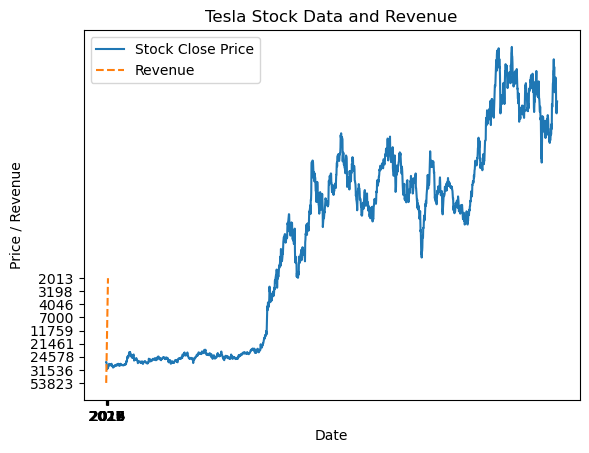

In [21]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, company_name):
    plt.plot(stock_data.index, stock_data['Close'], label='Stock Close Price')

    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', linestyle='--')

    plt.title(f'{company_name} Stock Data and Revenue')
    plt.xlabel('Date')
    plt.ylabel('Price / Revenue')
    plt.legend()
    plt.show()
make_graph(tesla_data.loc[:'2021-06'], tesla_revenue, 'Tesla')